# Phishing Email CEAS_08 Expolaratory Data Analysis

## Contents

- [1. Introduction and Data Profiling](#1-introduction-and-data-profiling)
- [2. Univariate Analysis](#2.Univariate-Ananlysis)
- [3.Some Useful Feature Engineering](#3.Some-Useful-Feature-Engineering)
- [4.Logistic Regression Traning and Benchmarks](#4.Logistic-Regression-Traning-and-Benchmarks)

### 1.Introduction and Data Profiling

In [14]:
import pandas as pd
import numpy as np
import plotly as pio
import plotly.express as px

In [3]:
path = "Dataset/CEAS_08.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [6]:
df.shape

(39154, 7)

###### In CEAS_08 we hace 39,154 entries and 7 attributes

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [9]:
df['sender'] = df['sender'].astype(str)
df['receiver'] = df['receiver'].fillna('unknown').astype(str)
df['subject'] = df['subject'].astype(str)
df['body'] = df['body'].astype(str)


print(df.dtypes)


sender      object
receiver    object
date        object
subject     object
body        object
label        int64
urls         int64
dtype: object


In [11]:
df = df.drop(columns=['date'])


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  39154 non-null  object
 2   subject   39154 non-null  object
 3   body      39154 non-null  object
 4   label     39154 non-null  int64 
 5   urls      39154 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


### 2.Univariate Ananlysis

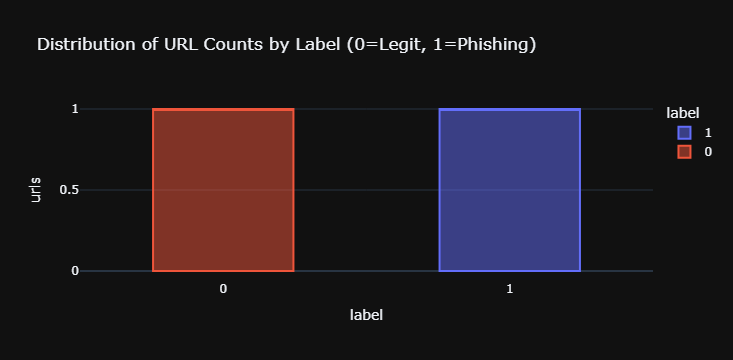

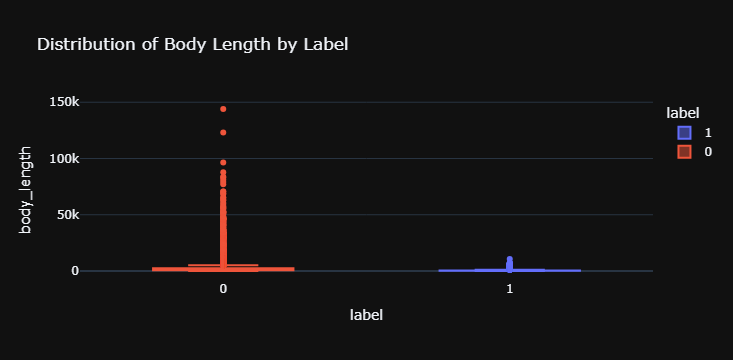

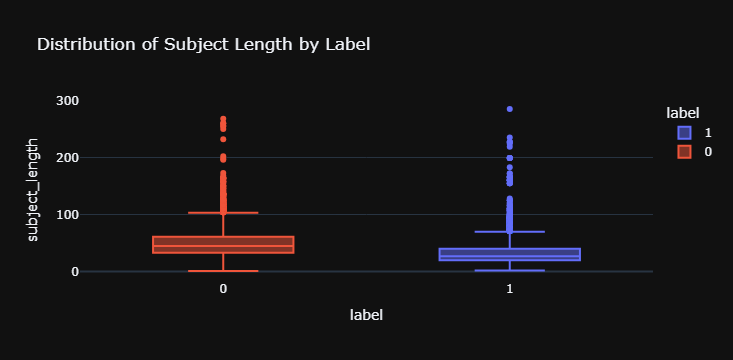

In [18]:
import pandas as pd
import plotly.express as px

# If not done earlier
df['text'] = df['subject'] + " " + df['body']
df['body_length'] = df['body'].apply(len)
df['subject_length'] = df['subject'].apply(len)

# 1️⃣ Box plot: URL count by label
fig1 = px.box(
    df,
    x='label',
    y='urls',
    color='label',
    template='plotly_dark',
    title='Distribution of URL Counts by Label (0=Legit, 1=Phishing)'
)
fig1.show()

# 2️⃣ Box plot: Body length by label
fig2 = px.box(
    df,
    x='label',
    y='body_length',
    color='label',
    template='plotly_dark',
    title='Distribution of Body Length by Label'
)
fig2.show()

# 3️⃣ Box plot: Subject length by label
fig3 = px.box(
    df,
    x='label',
    y='subject_length',
    color='label',
    template='plotly_dark',
    title='Distribution of Subject Length by Label'
)
fig3.show()


In [19]:
df.groupby('label')['body_length'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,17312.0,2542.186287,5080.634677,14.0,709.00,1252.0,2468.0,143996.0
1,21842.0,801.379452,1279.876356,16.0,160.25,278.0,566.0,10782.0


🔍 Interpretation

Legitimate emails are on average 3× longer than phishing ones.

Legitimate ones also have much higher variance (std = 5080) — meaning their lengths vary wildly (from short replies to huge newsletters or threads).

Phishing emails are shorter and more uniform, clustering between 100–600 characters.

🧠 Inference

Phishing emails are concise and to the point (shorter content). Legitimate ones are verbose, often containing headers, disclaimers, or detailed communication.
➤ Body length is a strong indicator feature — short messages are more likely to be phishing.

In [20]:
df.groupby('label')['subject_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,17312.0,48.086876,21.241387,1.0,33.0,45.0,61.0,268.0
1,21842.0,31.616107,17.188471,2.0,20.0,27.0,40.0,285.0


🔍 Interpretation

Legitimate subjects average ~48 characters, phishing ones ~31 characters.

So phishing subjects are shorter by roughly 35% on average.

Their variation (std) is also smaller — phishing subjects follow tighter patterns, like “Verify Account”, “Password Expired”, “Urgent Update”.

🧠 Inference

Phishing emails tend to have short, action-triggering subjects, while legitimate ones are longer and descriptive.
➤ Subject length complements body length — both reinforce that phishing messages are brief and urgent.

### 3.Some Useful Feature Engineering

In [23]:
import re

df['sender_domain'] = df['sender'].str.extract(r'@([\w\.-]+)')
df['sender_domain'] = df['sender_domain'].fillna('unknown')

# 2️⃣ Extract Top-Level Domain (TLD)
df['tld'] = df['sender_domain'].str.extract(r'\.([a-zA-Z]+)$')

# 3️⃣ Create engineered features
df['domain_length'] = df['sender_domain'].apply(lambda x: len(str(x)))
df['has_digit'] = df['sender_domain'].str.contains(r'\d').astype(int)
df['has_dash'] = df['sender_domain'].str.contains(r'-').astype(int)

# Suspicious / low-reputation TLDs
suspicious_tlds = ['xyz', 'top', 'ru', 'cn', 'click', 'info', 'buzz', 'work']
df['suspicious_tld'] = df['tld'].isin(suspicious_tlds).astype(int)

# Brand mimic / impersonation pattern
brand_keywords = ['paypal', 'amazon', 'bank', 'apple', 'microsoft', 'secure', 'update', 'verify', 'alert']
df['brand_mimic'] = df['sender_domain'].str.contains('|'.join(brand_keywords), case=False).astype(int)

# Subdomain count - how many dots before TLD
df['subdomain_count'] = df['sender_domain'].apply(lambda x: x.count('.'))

df = df.fillna({'tld': 'unknown'})

df = df.drop(columns=['sender', 'sender_domain'])


In [24]:
df.head(10)

,receiver,subject,body,label,urls,text,body_length,subject_length,tld,domain_length,has_digit,has_dash,suspicious_tld,brand_mimic,subdomain_count
0,user4@gvc.ceas-challenge.cc,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,"Never agree to be a loser Buck up, your troubl...",273,25,de,9,0,0,0,0,1
1,user2.2@gvc.ceas-challenge.cc,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,Befriend Jenna Jameson \nUpgrade your sex and ...,82,22,ph,9,0,0,0,0,1
2,user2.9@gvc.ceas-challenge.cc,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,CNN.com Daily Top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,3918,20,br,19,0,0,0,0,2
3,SpamAssassin Dev <xrh@spamassassin.apache.org>,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,Re: svn commit: r619753 - in /spamassassin/tru...,24418,150,com,9,0,0,0,0,1
4,user2.2@gvc.ceas-challenge.cc,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,SpecialPricesPharmMoreinfo \nWelcomeFastShippi...,175,26,com,19,0,0,0,0,1
5,user7-ext5@gvc.ceas-challenge.cc,From Caroline Aragon,\n\n\n\n\nYo wu urS mo ou go rc ebo eForM rgi ...,1,0,From Caroline Aragon \n\n\n\n\nYo wu urS mo ou...,93,20,com,19,0,0,0,0,1
6,user2.10@gvc.ceas-challenge.cc,Replica Watches,We have fake Swiss Men's and Ladie's Replica \...,1,0,Replica Watches We have fake Swiss Men's and L...,115,15,com,21,0,0,0,0,1
7,user2.3@gvc.ceas-challenge.cc,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,CNN.com Daily Top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,3918,20,com,9,0,0,0,0,1
8,xrh@spamassassin.apache.org,[Bug 5780] URI processing turns uuencoded stri...,http://issues.apache.org/SpamAssassin/show_bug...,0,1,[Bug 5780] URI processing turns uuencoded stri...,450,87,org,17,0,0,0,0,2
9,user7@gvc.ceas-challenge.cc,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,CNN.com Daily Top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,3918,20,it,16,0,0,0,0,1


In [27]:
target_attribute = df['label']

feature_attributes_text = df[['subject', 'body']]  # For transformer / text model

feature_attributes_meta = df[['domain_length', 'has_digit', 'has_dash',
                              'suspicious_tld', 'brand_mimic',
                              'subdomain_count', 'tld']]  # For numeric/categorical model


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   receiver         39154 non-null  object
 1   subject          39154 non-null  object
 2   body             39154 non-null  object
 3   label            39154 non-null  int64 
 4   urls             39154 non-null  int64 
 5   text             39154 non-null  object
 6   body_length      39154 non-null  int64 
 7   subject_length   39154 non-null  int64 
 8   tld              39154 non-null  object
 9   domain_length    39154 non-null  int64 
 10  has_digit        39154 non-null  int32 
 11  has_dash         39154 non-null  int32 
 12  suspicious_tld   39154 non-null  int32 
 13  brand_mimic      39154 non-null  int32 
 14  subdomain_count  39154 non-null  int64 
dtypes: int32(4), int64(6), object(5)
memory usage: 3.9+ MB


In [29]:
import os

save_path = os.path.join('Dataset', 'Engineered_CEAS_08.csv')
SV (without index)
df.to_csv(save_path, index=False)

print(f"✅ Engineered dataset saved successfully at: {save_path}")
print(f"Shape: {df.shape}")


✅ Engineered dataset saved successfully at: Dataset\Engineered_CEAS_08.csv
Shape: (39154, 15)


In [30]:
import pandas as pd
import os

# Load your engineered dataset
df = pd.read_csv("Dataset/Engineered_CEAS_08.csv")

# ✅ 1. Fill missing subject values
df['subject'] = df['subject'].fillna('')

# ✅ 2. Drop redundant columns (not contributing to model)
# 'urls' – low info gain, 'text' – unclear / duplicate
df = df.drop(columns=['urls', 'text'], errors='ignore')

# ✅ 3. Drop receiver if not being used for modeling
df = df.drop(columns=['receiver'], errors='ignore')

# ✅ 4. Optional: clip extreme outliers in domain_length or body_length
df['domain_length'] = df['domain_length'].clip(0, 60)
df['body_length'] = df['body_length'].clip(0, 20000)

# ✅ 5. Final quick verification
print("Final shape:", df.shape)
print("Nulls per column:\n", df.isnull().sum())
print("Label balance:\n", df['label'].value_counts(normalize=True))

# ✅ 6. Save the cleaned, final dataset
save_path = os.path.join("Dataset", "Final_Engineered_CEAS_08.csv")
df.to_csv(save_path, index=False)

print(f"\n✅ Final cleaned dataset saved successfully at: {save_path}")


Final shape: (39154, 12)
Nulls per column:
 subject            0
body               0
label              0
body_length        0
subject_length     0
tld                0
domain_length      0
has_digit          0
has_dash           0
suspicious_tld     0
brand_mimic        0
subdomain_count    0
dtype: int64
Label balance:
 label
1    0.557848
0    0.442152
Name: proportion, dtype: float64

✅ Final cleaned dataset saved successfully at: Dataset\Final_Engineered_CEAS_08.csv


### 4.Logistic Regression Traning and Benchmarks

=== Logistic Regression Baseline Metrics ===
Accuracy  : 0.9941
Precision : 0.9936
Recall    : 0.9958
F1 Score  : 0.9947


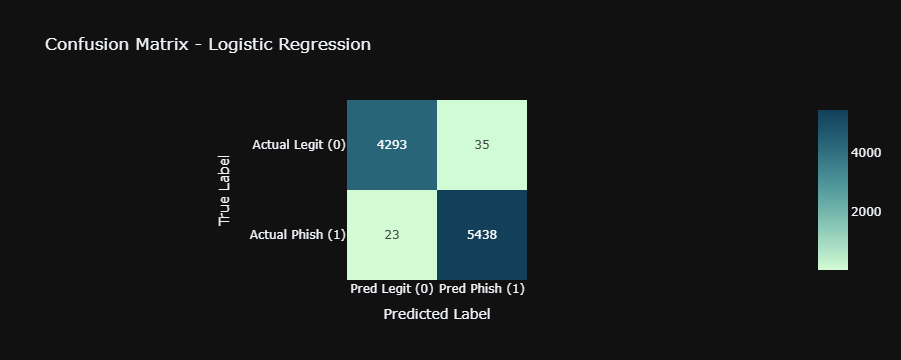


✅ Model and TF-IDF vectorizer saved successfully.


In [31]:
# ==============================
# 📧 Phishing Email Classifier - Logistic Regression Baseline
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import plotly.express as px
import joblib
import os

# ==============================
# 1️⃣ Load dataset
# ==============================
path = "Dataset/Final_Engineered_CEAS_08.csv"
df_final = pd.read_csv(path)

# Combine subject + body as text input
df_final['text'] = df_final['subject'].fillna('') + ' ' + df_final['body'].fillna('')

# ==============================
# 2️⃣ Split data (75-25)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    df_final['text'],
    df_final['label'],
    test_size=0.25,
    stratify=df_final['label'],
    random_state=42
)

# ==============================
# 3️⃣ TF-IDF Vectorization
# ==============================
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ==============================
# 4️⃣ Train Logistic Regression
# ==============================
lr = LogisticRegression(max_iter=300, random_state=42)
lr.fit(X_train_tfidf, y_train)

# ==============================
# 5️⃣ Predictions
# ==============================
y_pred = lr.predict(X_test_tfidf)

# ==============================
# 6️⃣ Performance Metrics
# ==============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Logistic Regression Baseline Metrics ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# ==============================
# 7️⃣ Confusion Matrix (Plotly)
# ==============================
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual Legit (0)', 'Actual Phish (1)'],
    columns=['Pred Legit (0)', 'Pred Phish (1)']
)

fig = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='darkmint',
    title="Confusion Matrix - Logistic Regression",
    template='plotly_dark'
)
fig.update_layout(
    xaxis_title="Predicted Label",
    yaxis_title="True Label"
)
fig.show()

# ==============================
# 8️⃣ Save model + vectorizer
# ==============================
os.makedirs("Models", exist_ok=True)
joblib.dump(lr, "Models/email_LR_baseline.pkl")
joblib.dump(tfidf, "Models/tfidf_vectorizer.pkl")

print("\n✅ Model and TF-IDF vectorizer saved successfully.")


### 5.DistilBERT Fine-Tuning

In [44]:
# ==============================
# 🤖 DistilBERT Manual Fine-Tuning (PyTorch + Transformers >=4.53)
# ==============================

import os
import random
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import plotly.express as px
import joblib

# ==============================
# 1️⃣ Reproducibility
# ==============================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# ==============================
# 2️⃣ Load dataset
# ==============================
path = "Dataset/Final_Engineered_CEAS_08.csv"
df = pd.read_csv(path)
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.25, stratify=df['label'], random_state=42
)

# ==============================
# 3️⃣ Tokenization
# ==============================
MODEL_NAME = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

train_enc = tokenizer(list(X_train), truncation=True, padding=True, max_length=256)
test_enc = tokenizer(list(X_test), truncation=True, padding=True, max_length=256)

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(int(self.labels.iloc[idx]))
        return item

train_dataset = EmailDataset(train_enc, y_train)
test_dataset  = EmailDataset(test_enc, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=8, shuffle=False)

# ==============================
# 4️⃣ Model + Optimizer
# ==============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

# ==============================
# 5️⃣ Training loop
# ==============================
EPOCHS = 2
model.train()

for epoch in range(EPOCHS):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{EPOCHS} - Training loss: {avg_loss:.4f}")

# ==============================
# 6️⃣ Evaluation
# ==============================
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=-1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Metrics
acc = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds)
rec = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print("\n=== DistilBERT Fine-Tuning Results (Transformers ≥4.53) ===")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

# ==============================
# 7️⃣ Confusion Matrix
# ==============================
cm = confusion_matrix(all_labels, all_preds)
cm_df = pd.DataFrame(
    cm,
    index=['Actual Legit (0)', 'Actual Phish (1)'],
    columns=['Pred Legit (0)', 'Pred Phish (1)']
)
fig = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='darkmint',
    title="Confusion Matrix - DistilBERT (Manual Fine-Tuning)",
    template='plotly_dark'
)
fig.update_layout(xaxis_title="Predicted Label", yaxis_title="True Label")
fig.show()

# ==============================
# 8️⃣ Save model + tokenizer + metrics
# ==============================
os.makedirs("Models/email_BERT_modern", exist_ok=True)
model.save_pretrained("Models/email_BERT_modern")
tokenizer.save_pretrained("Models/email_BERT_modern")

metrics = {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}
joblib.dump(metrics, "Models/email_BERT_modern_metrics.pkl")

print("\n✅ Model and metrics saved successfully.")



ModuleNotFoundError: Could not import module 'AutoTokenizer'. Are this object's requirements defined correctly?

In [40]:
import transformers
print(transformers.__version__)



4.53.1


In [41]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


Torch version: 2.7.1+cu128
CUDA available: True


In [45]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification
print("transformers ok:", __import__('transformers').__version__)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", use_fast=True)
print("tokenizer loaded")

ModuleNotFoundError: Could not import module 'AutoTokenizer'. Are this object's requirements defined correctly?

# 